In [1]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
warnings.filterwarnings("ignore")
from scipy.interpolate import make_interp_spline, interp1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

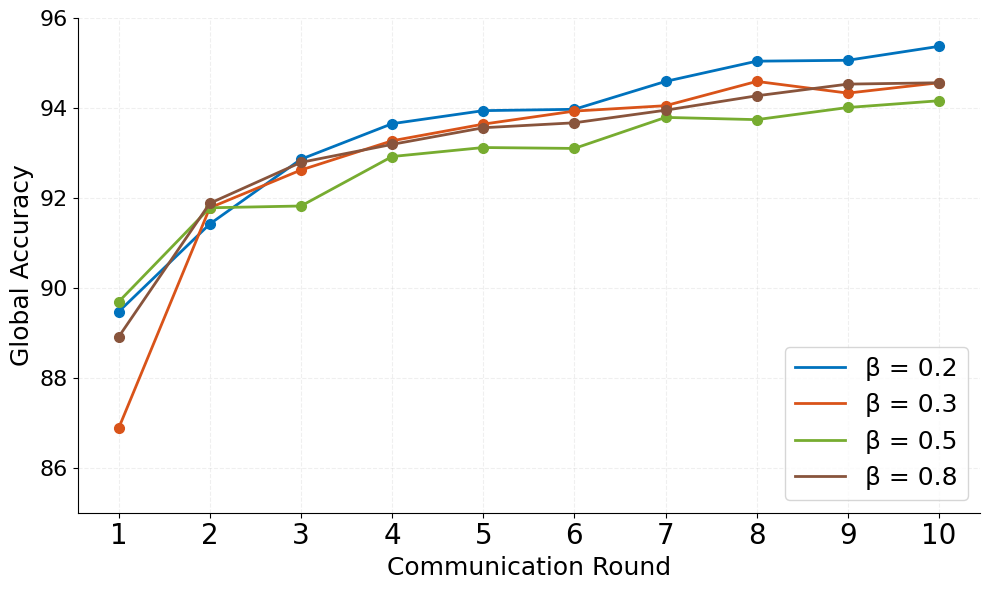

In [2]:
accuracy_dict = {
    0.2: [89.47, 91.42, 92.86, 93.65, 93.94, 93.97, 94.59, 95.04, 95.06, 95.37],
    0.3: [86.88, 91.78, 92.62, 93.27, 93.64, 93.93, 94.05, 94.59, 94.33, 94.56],
    0.5: [89.69, 91.78, 91.82, 92.92, 93.12, 93.10, 93.79, 93.74, 94.01, 94.16],
    0.8: [88.91, 91.88, 92.79, 93.19, 93.56, 93.67, 93.95, 94.27, 94.53, 94.56],
}


colors = {
    0.1: '#ed1c24',
    0.2: '#0072bd',
    0.3: '#d95319',
    0.4: '#ff69b4',
    0.5: '#77ac30',
    0.6: '#808080',
    0.8: '#88543c'
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for momentum, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, accuracies_smooth, color=colors[momentum], label=f"β = {momentum}", linewidth=2)

    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=colors[momentum], markersize=7)

# ax.set_title("Global Accuracy per Round (FedAvgM with Varying Momentum)", fontsize=15)
# ax.set_xlabel("Communication Round\n(Experiments with 15 clients, local_epochs = 1 to 5, total rounds = 10)", fontsize=15)
ax.set_xlabel("Communication Round", fontsize=18)
ax.tick_params(axis='x', labelsize=20)  
ax.tick_params(axis='y', labelsize=16) 
ax.set_xticks(rounds)
ax.set_ylim(85, 96)
ax.set_ylabel("Global Accuracy", fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.2)
ax.legend(title="", fontsize=18, title_fontsize=15)

plt.tight_layout()
plt.savefig("images/momentum_plot.pdf", format='pdf')
plt.show()


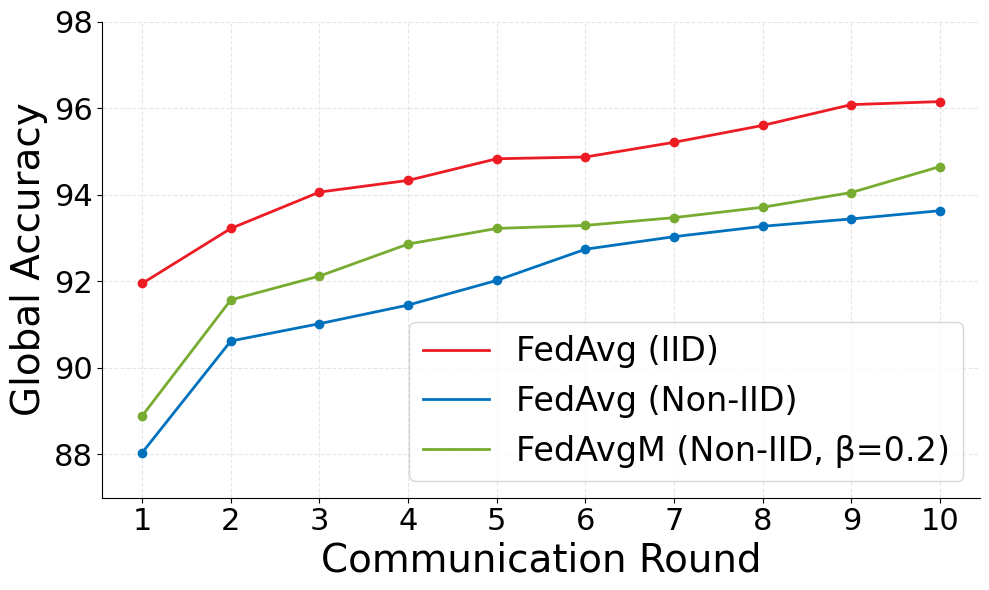

In [3]:
accuracy_dict = {
    'FedAvg (IID)': [91.95, 93.22, 94.06, 94.33, 94.83, 94.87, 95.21, 95.60, 96.08, 96.15],
    'FedAvg (Non-IID)': [88.04, 90.62, 91.02, 91.45, 92.02, 92.74, 93.03, 93.27, 93.44, 93.63],
    'FedAvgM (Non-IID, β=0.2)': [88.89, 91.57, 92.12, 92.86, 93.22, 93.29, 93.47, 93.71, 94.05, 94.65],
}

custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=15, fontweight='bold')
# ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylim(87, 98)
ax.set_ylabel("Global Accuracy", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_10_global_accuracy_plot.pdf", format='pdf')
# plt.savefig("client_10_global_accuracy_plot.svg", format='svg')
plt.show()


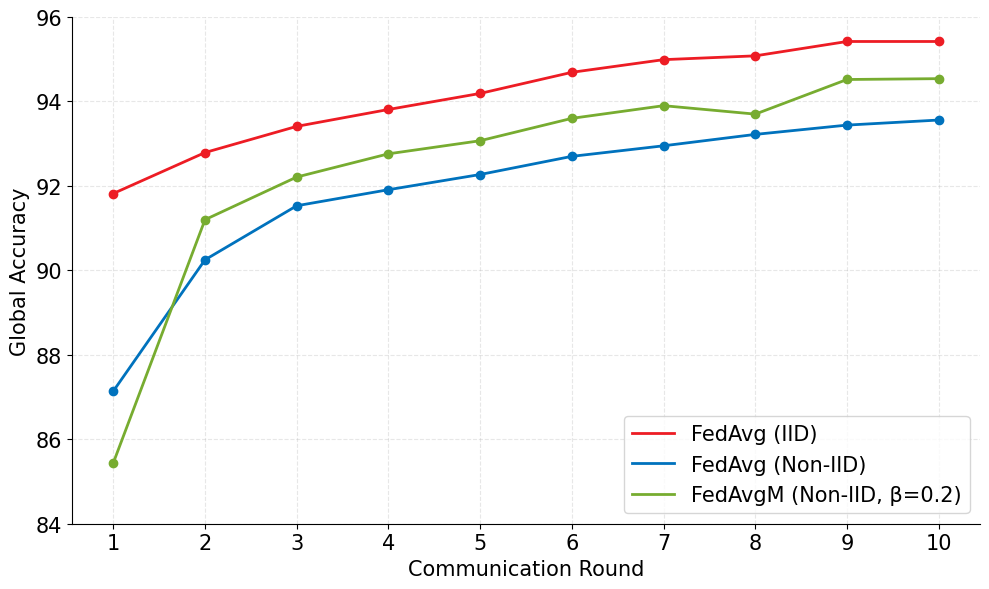

In [4]:
accuracy_dict = {
    'FedAvg (IID)': [91.82, 92.79, 93.41, 93.81, 94.19, 94.69, 94.99, 95.08, 95.42, 95.42],
    'FedAvg (Non-IID)': [87.14, 90.25, 91.53, 91.91, 92.27, 92.7, 92.95, 93.22, 93.44, 93.56],
    'FedAvgM (Non-IID, β=0.2)': [85.44, 91.2, 92.21, 92.76, 93.07, 93.6, 93.9, 93.7, 94.52, 94.54],
}

custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 15 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_xlabel("Communication Round", fontsize=15)
ax.tick_params(axis='x', labelsize=15)  
ax.tick_params(axis='y', labelsize=15) 
ax.set_xticks(rounds)
ax.set_ylim(84, 96)
ax.set_ylabel("Global Accuracy", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 15},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_15_global_accuracy_plot.svg", format='svg')
plt.show()

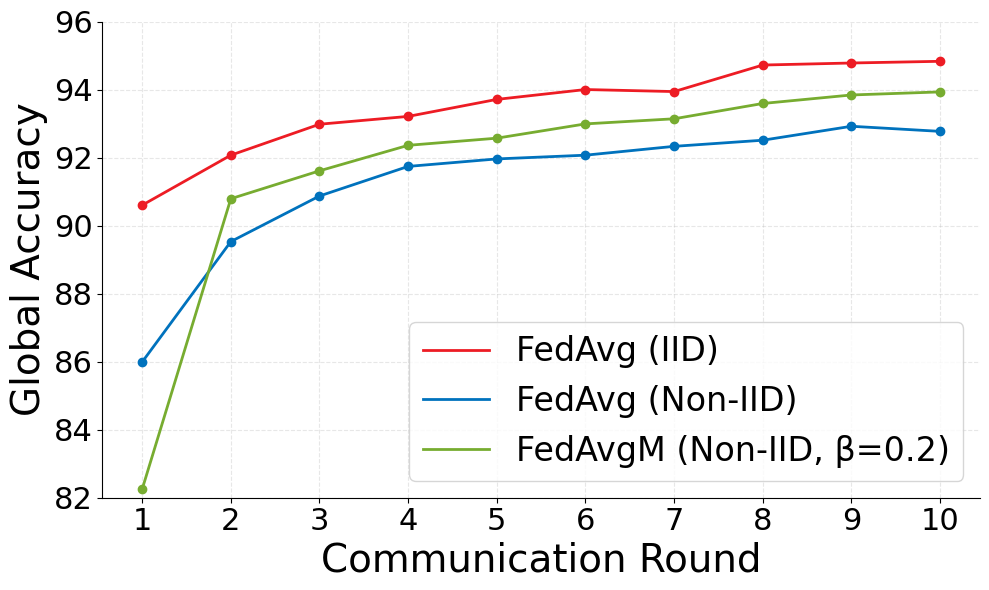

In [5]:
accuracy_dict = {
    'FedAvg (IID)': [90.60, 92.07, 92.98, 93.21, 93.71, 94.00, 93.94, 94.72, 94.78, 94.83],
    'FedAvg (Non-IID)': [85.99, 89.53, 90.87, 91.74, 91.96, 92.07, 92.33, 92.51, 92.92, 92.77],
    'FedAvgM (Non-IID, β=0.2)': [82.25, 90.79, 91.61, 92.36, 92.57, 92.99, 93.14, 93.59, 93.84, 93.93],
}

custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 20 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylim(82, 96)
ax.set_ylabel("Global Accuracy", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_20_global_accuracy_plot.pdf", format='pdf')
plt.show()

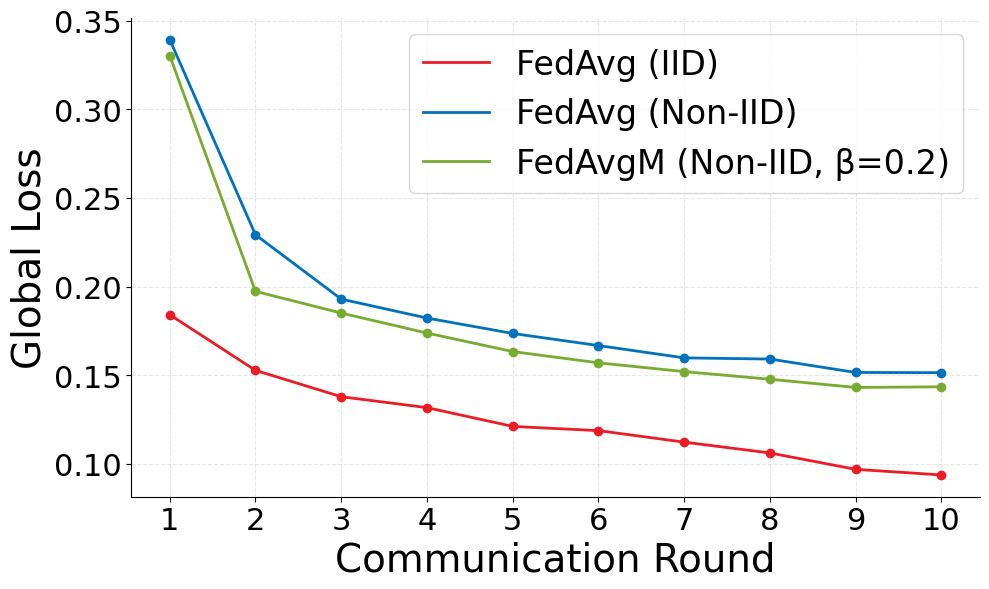

In [6]:
loss_dict = {
    'FedAvg (IID)': [0.184206, 0.152835, 0.137988, 0.13184, 0.121244, 0.118866, 0.112381, 0.106281, 0.09705, 0.093881],
    'FedAvg (Non-IID)': [0.339342, 0.229274, 0.193016, 0.182325, 0.173642, 0.166821, 0.159873, 0.159214, 0.151658, 0.151537],
    'FedAvgM (Non-IID, β=0.2)': [0.330324, 0.197373, 0.185143, 0.173884, 0.163433, 0.157089, 0.152133, 0.147833, 0.143204, 0.143567],
}


custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, losses in loss_dict.items():
    rounds_np = np.array(rounds)
    losses_np = np.array(losses)

    interpolator = interp1d(rounds_np, losses_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    losses_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, losses_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, losses_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Loss per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)

ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylabel("Global Loss", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_10_global_loss_plot.pdf", format='pdf')
plt.show()

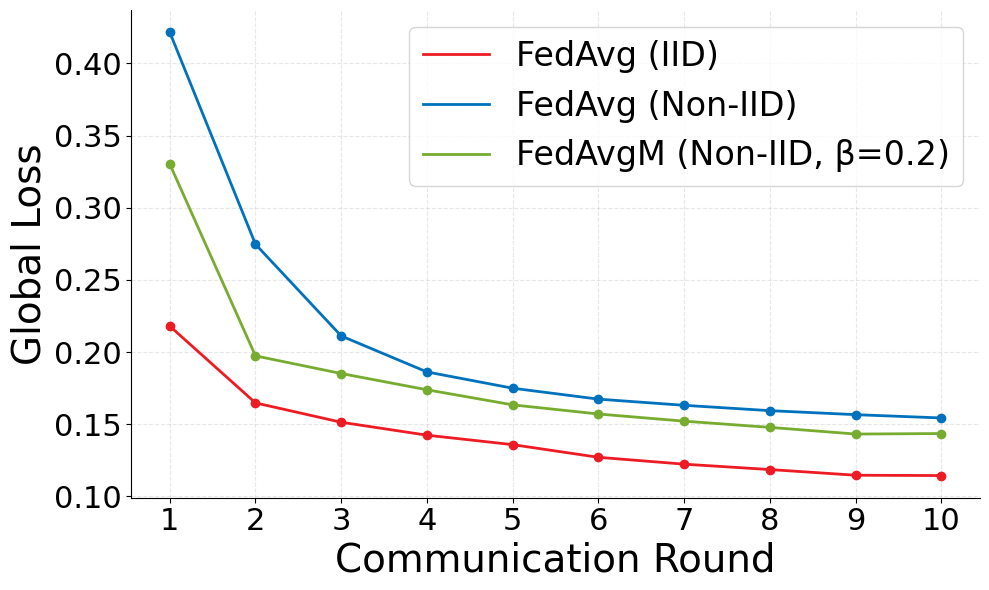

In [7]:
loss_dict = {
    'FedAvg (IID)': [ 0.218009, 0.164786, 0.151387, 0.142422, 0.135866, 0.127102, 0.122342, 0.118613, 0.114678, 0.114455],
    'FedAvg (Non-IID)': [0.421636, 0.274698, 0.211177, 0.186239, 0.174962, 0.167392, 0.163116, 0.159414, 0.156638, 0.154353],
    'FedAvgM (Non-IID, β=0.2)': [0.330324, 0.197373, 0.185143, 0.173884, 0.163433, 0.157089, 0.152133, 0.147833, 0.143204, 0.143567],
}



custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, losses in loss_dict.items():
    rounds_np = np.array(rounds)
    losses_np = np.array(losses)

    interpolator = interp1d(rounds_np, losses_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    losses_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, losses_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, losses_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Loss per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)

ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylabel("Global Loss", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_15_global_loss_plot.pdf", format='pdf')
plt.show()

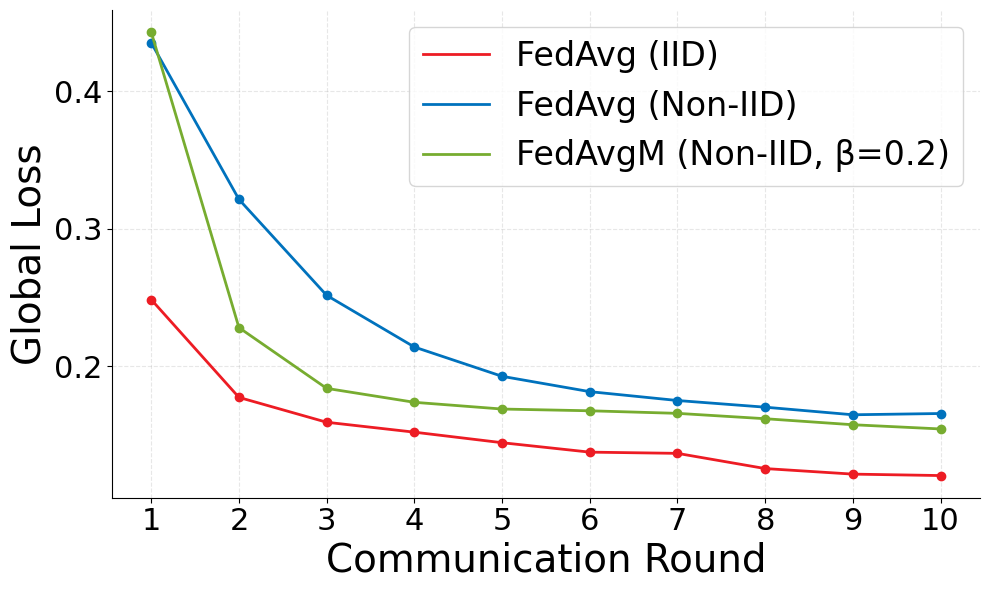

In [8]:
loss_dict = {
    'FedAvg (IID)': [0.248515, 0.17733, 0.159248, 0.15203, 0.144366, 0.137496, 0.136608, 0.125544, 0.121497, 0.120454],
    'FedAvg (Non-IID)': [0.435442, 0.321452, 0.251607, 0.214003, 0.192687, 0.181519, 0.175072, 0.170217, 0.164690, 0.165611],
    'FedAvgM (Non-IID, β=0.2)': [0.443144, 0.228119, 0.183906, 0.173764, 0.168866, 0.167593, 0.165722, 0.161823, 0.157441, 0.154372],
}

custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, losses in loss_dict.items():
    rounds_np = np.array(rounds)
    losses_np = np.array(losses)

    interpolator = interp1d(rounds_np, losses_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    losses_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, losses_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, losses_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Loss per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)

ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylabel("Global Loss", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_20_global_loss_plot.pdf", format='pdf')
plt.show()

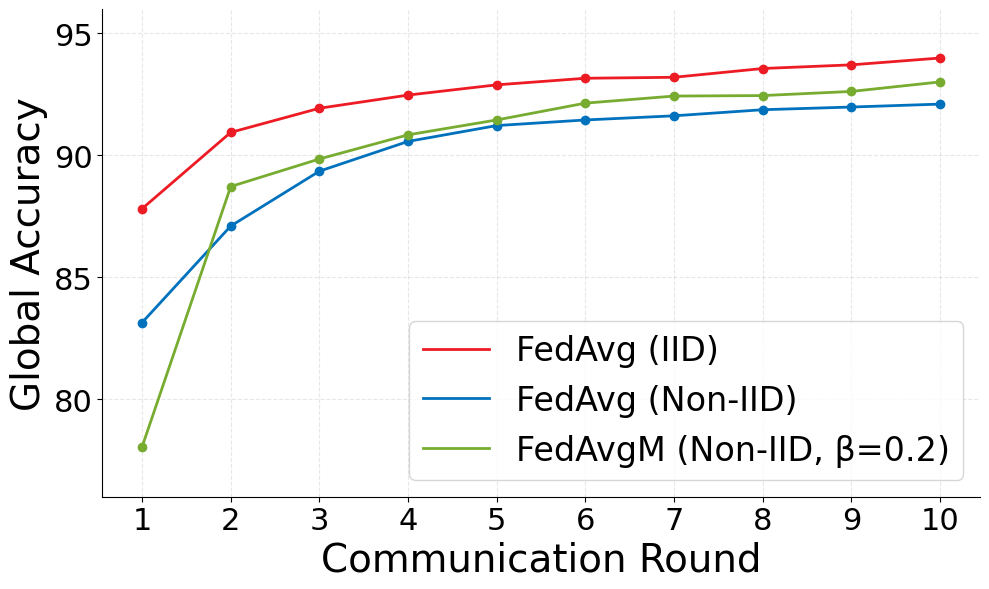

In [9]:
accuracy_dict = {
    'FedAvg (IID)': [87.81, 90.94, 91.93, 92.47, 92.89, 93.16, 93.20, 93.56, 93.71, 93.99],
    'FedAvg (Non-IID)': [83.14, 87.10, 89.35, 90.57, 91.22, 91.45, 91.62, 91.87, 91.98, 92.10],
    'FedAvgM (Non-IID, β=0.2)': [78.04, 88.72, 89.85, 90.84, 91.45, 92.14, 92.43, 92.45, 92.62, 93.01],
}

custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 1, total rounds = 10, total client participation 80% \n(FedAvg, FedAvg with non-iid and FedAvgM with non-iid and momentum(β) = 0.2)", fontsize=12)

ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylim(76, 96)
ax.set_ylabel("Global Accuracy", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_10_global_accuracy_epoch_1_80_cp_plot.pdf", format='pdf')
plt.show()


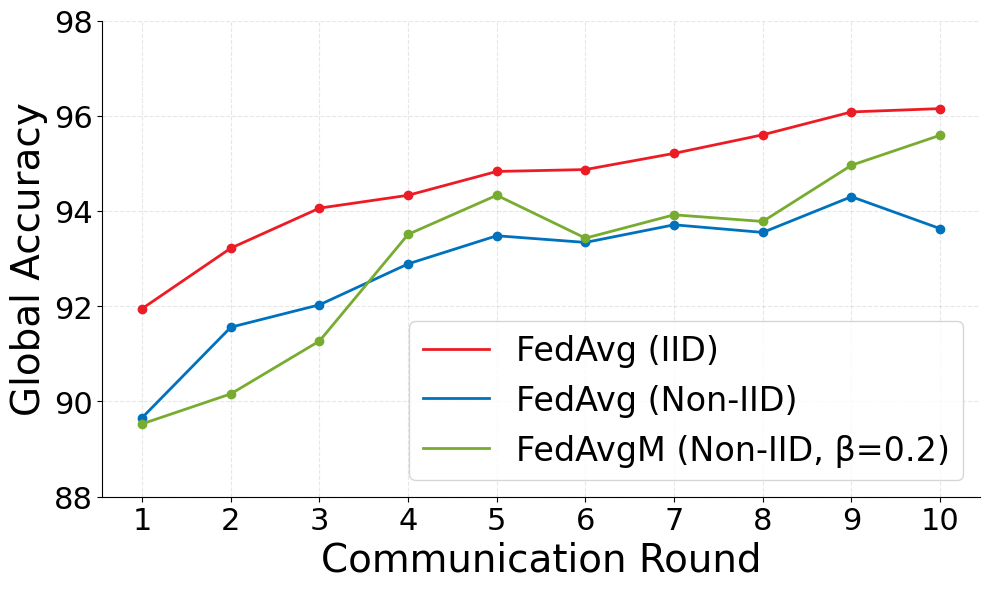

In [10]:
accuracy_dict = {
    'FedAvg (IID)': [91.95, 93.22, 94.06, 94.33, 94.83, 94.87, 95.21, 95.60, 96.08, 96.15],
    'FedAvg (Non-IID)': [89.66, 91.56, 92.03, 92.89, 93.48, 93.34, 93.71, 93.55, 94.30, 93.63],
    'FedAvgM (Non-IID, β=0.2)': [89.53, 90.16, 91.27, 93.51, 94.33, 93.43, 93.92, 93.78, 94.96, 95.59],
}

custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, β=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
# ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5, total rounds = 10, total client participation 80% \n(FedAvg, FedAvg with non-iid and FedAvgM with non-iid and momentum(β) = 0.2)", fontsize=12)

ax.set_xlabel("Communication Round", fontsize=28)
ax.tick_params(axis='x', labelsize=22)  
ax.tick_params(axis='y', labelsize=22) 
ax.set_xticks(rounds)
ax.set_ylim(88, 98)
ax.set_ylabel("Global Accuracy", fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(
    title="", 
    prop={ 'size': 24},  
    # title_fontproperties={'weight': 'bold', 'size': 26} 
)

plt.tight_layout()
plt.savefig("images/client_10_global_accuracy_epoch_5_80_cp_plot.pdf", format='pdf')
plt.show()
